# Red para COVID-19

Esta es una red secuencial simple para tratar de predecir el dato de número de contagiados de COVID19 en México que se da a las 19:00 horas por parte del gobierno.

**Para ejecutar la predicción:**

**1)** Ejecutar processing.sh, este script descarga el archivo time_series_covid19_confirmed_global.csv con datos de contagiados por país. Este archivo se actualiza en internet aproximadamente a las 5:30pm con datos del día anterior, hay que revisar que esté actualizado a la fecha del día de la predicción.

chmod +x processing.sh

./processing.sh

**2)** Abrir jupyter notebook (se requiere keras, tensorflow, pandas y numpy instaldos).

jupyter notebook COVID-19.ipynb

**3)** Actualizar dias_a_usar y dia_a_predecir. Como referencia, el 30 de marzo fue el día 33 de infección en México, por lo que dia_a_predecir=33 y dias_a_usar=32.

**4)** Ejecutar todos los cuadros.

Creado por Juan Felipe Huan Lew Yee, Neftalí Isaí Rodríguez Rojas y Jorge Martín del Campo Ramírez.

Se define la clase pais

Definimos el dia que queremos la prediccion

In [1]:
dia_a_predecir = 35
dias_a_usar = 33

Definimos la lista de paises que analizaremos. (Hay más paises en la base de datos de John Hopkins)

In [2]:
#Quite a Vietnam y Dominica porque siempre salen mal sus predicciones.
country_namelist = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea South', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Maldives', 'Malta', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe', 'Dominica', 'Grenada', 'Mozambique', 'Syria', 'Timor-Leste', 'Belize', 'Laos', 'Libya', 'Guinea-Bissau', 'Mali', 'Saint Kitts and Nevis', 'Burma', 'Botswana', 'Burundi', 'Sierra Leone', 'Malawi']

Abrimos la base de datos de Superficie, Población y Continente por país, creamos un objeto para cada país. Posterirmente, abirmos la base de datos de John Hopkins y extraemos los datos de infectos por día y la latitud y longitud de cada país. También calculamos el día de inicio de la infección

In [3]:
db = open('database.csv','w')

print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud",end=',',file=db,sep=',')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ',')
print(dia_a_predecir,file=db)

for country in country_namelist:
    f = open('propiedades_por_pais.csv')
    for line in f:
        if(country in line):
            pais=line.replace('\n','').split(',')[0]
            superficie=line.replace('\n','').split(',')[1]
            poblacion=line.replace('\n','').split(',')[2]
            namerica=line.replace('\n','').split(',')[3]
            samerica=line.replace('\n','').split(',')[4]
            europe=line.replace('\n','').split(',')[5]
            asia=line.replace('\n','').split(',')[6]
            oceania=line.replace('\n','').split(',')[7]
            africa=line.replace('\n','').split(',')[8]
            pib=line.replace('\n','').split(',')[9]
            salud_pib=line.replace('\n','').split(',')[10]            
    f.close()
    
    f = open('database_confirmed.csv')
    infected = []
    dia_inicio = 0
    for line in f:
        if(country in line.split(',')[1]):
            lat = float(line.split(',')[2])
            long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    infected.append(int(number))
                else:
                    dia_inicio += 1                    
    f.close()

    if(len(infected)<=dia_a_predecir):
#        print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,pib,salud_pib,len(infected))
        continue
    print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,dia_inicio,pib,salud_pib,end=',',file=db,sep=',')
    for value in infected[:dias_a_usar]:
        print(value,file=db,end = ',')
    print(infected[dia_a_predecir-1],file=db)
db.close()          

Usamos la lista de objetos Pais para nuestra propia base de datos.

Importamos librerias

In [4]:
import numpy as np
import keras
import pandas as pd

Using TensorFlow backend.


Leamos la base de datos que acabamos de crear.

In [5]:
data = pd.read_csv("database.csv",sep=',') 

Imprimimos la base de datos

In [6]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Afghanistan,652230.0,3.222556e+07,0,0,0,1,0,0,33.000000,...,22,24,24,40,40,74,84,94,110,120
1,Algeria,2381741.0,4.300000e+07,0,0,0,0,0,1,28.033900,...,90,139,201,230,264,302,367,409,454,584
2,Australia,7692024.0,2.566534e+07,0,0,0,0,1,0,-31.996188,...,15,15,15,15,15,15,15,15,15,25
3,Austria,83871.0,8.902600e+06,0,0,1,0,0,0,47.516200,...,2388,2814,3582,4474,5283,5588,6909,7657,8271,9618
4,Bahrain,778.0,1.543300e+06,0,0,0,1,0,0,26.027500,...,278,285,305,334,377,392,419,458,466,499
5,Belgium,30528.0,1.152445e+07,0,0,1,0,0,0,50.833300,...,1,1,2,8,13,23,50,109,169,239
6,Brazil,8515767.0,2.113367e+08,0,1,0,0,0,0,-14.235000,...,1021,1546,1924,2247,2554,2985,3417,3904,4256,5717
7,Cambodia,181035.0,1.528849e+07,0,0,0,1,0,0,11.550000,...,1,1,1,1,1,1,1,1,1,1
8,Canada,9984670.0,3.797909e+07,1,0,0,0,0,0,47.982907,...,8,8,9,9,9,10,11,11,13,20
9,China,9596961.0,1.402030e+09,0,0,0,1,0,0,32.828385,...,68413,70513,72434,74211,74619,75077,75550,77001,77022,77754


Normalizamos algunas variables

In [7]:
from sklearn import preprocessing

print("Area")
area = data.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
areamax=area.max()
areamin=area.min()
normalized_area=(area-area.min())/(area.max()-area.min())
print(areamin,areamax)
data['Area'] = normalized_area
print(areamin,areamax)

print("Poblacion")
poblacion = data.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
poblacionmax=poblacion.max()
poblacionmin=poblacion.min()
normalized_poblacion=(poblacion-poblacion.min())/(poblacion.max()-poblacion.min())
print(poblacionmin,poblacionmax)
data['poblacion'] = normalized_poblacion
print(poblacionmin,poblacionmax)

print("lat")
lat = data.lat #returns a numpy array
latmax=lat.max()
latmin=lat.min()
normalized_lat=(lat-lat.min())/(lat.max()-lat.min())
print(latmin,latmax)
data['lat'] = normalized_lat
print(latmin,latmax)

print("long")
long = data.long #returns a numpy array
longmax=long.max()
longmin=long.min()
normalized_long=(long-long.min())/(long.max()-long.min())
print(longmin,longmax)
data['long'] = normalized_long
print(longmin,longmax)

print("Dia_inicio")
Dia_inicio = data.Dia_inicio #returns a numpy array
Dia_iniciomax=Dia_inicio.max()
Dia_iniciomin=Dia_inicio.min()
normalized_Dia_inicio=(Dia_inicio-Dia_inicio.min())/(Dia_inicio.max()-Dia_inicio.min())
print(Dia_iniciomin,Dia_iniciomax)
data['Dia_inicio'] = normalized_Dia_inicio
print(Dia_iniciomin,Dia_iniciomax)

print("PIB")
PIB = data.PIB #returns a numpy array
PIBmax=PIB.max()
PIBmin=PIB.min()
normalized_PIB=(PIB-PIB.min())/(PIB.max()-PIB.min())
print(PIBmin,PIBmax)
data['PIB'] = normalized_PIB
print(PIBmin,PIBmax)

print("Gasto_Salud")
Gasto_Salud = data.Gasto_Salud #returns a numpy array
Gasto_Saludmax=Gasto_Salud.max()
Gasto_Saludmin=Gasto_Salud.min()
normalized_Gasto_Salud=(Gasto_Salud-Gasto_Salud.min())/(Gasto_Salud.max()-Gasto_Salud.min())
print(Gasto_Saludmin,Gasto_Saludmax)
data['Gasto_Salud'] = normalized_Gasto_Salud
print(Gasto_Saludmin,Gasto_Saludmax)

Area
61.0 17098246.0
61.0 17098246.0
Poblacion
33574.0 1402030160.0
33574.0 1402030160.0
lat
-31.9961875 64.0
-31.9961875 64.0
long
-95.7129 141.2327875
-95.7129 141.2327875
Dia_inicio
0 225
0 225
PIB
593.0 21439453.0
593.0 21439453.0
Gasto_Salud
0.47 14.32
0.47 14.32


Imprimimos la base de datos normalizada

In [8]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Afghanistan,0.038143,0.022962,0,0,0,1,0,0,0.677071,...,22,24,24,40,40,74,84,94,110,120
1,Algeria,0.139294,0.030647,0,0,0,0,0,1,0.625338,...,90,139,201,230,264,302,367,409,454,584
2,Australia,0.449870,0.018282,0,0,0,0,1,0,0.000000,...,15,15,15,15,15,15,15,15,15,25
3,Austria,0.004902,0.006326,0,0,1,0,0,0,0.828287,...,2388,2814,3582,4474,5283,5588,6909,7657,8271,9618
4,Bahrain,0.000042,0.001077,0,0,0,1,0,0,0.604437,...,278,285,305,334,377,392,419,458,466,499
5,Belgium,0.001782,0.008196,0,0,1,0,0,0,0.862841,...,1,1,2,8,13,23,50,109,169,239
6,Brazil,0.498047,0.150716,0,1,0,0,0,0,0.185020,...,1021,1546,1924,2247,2554,2985,3417,3904,4256,5717
7,Cambodia,0.010584,0.010881,0,0,0,1,0,0,0.453624,...,1,1,1,1,1,1,1,1,1,1
8,Canada,0.583957,0.027065,1,0,0,0,0,0,0.833149,...,8,8,9,9,9,10,11,11,13,20
9,China,0.561282,1.000000,0,0,0,1,0,0,0.675283,...,68413,70513,72434,74211,74619,75077,75550,77001,77022,77754


Creamos un conjunto X y un conjunto Y y dividimos train y test

In [9]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
X['Area'] = data['Area']
X['poblacion'] = data['poblacion']
X['Namerica'] = data['Namerica']
X['Samerica'] = data['Samerica']
X['Europe'] = data['Europe']
X['Asia'] = data['Asia']
X['Oceania'] = data['Oceania']
X['lat'] = data['lat']
X['long'] = data['long']
X['Dia_inicio'] = data['Dia_inicio']
X['PIB'] = data['PIB']
X['Gasto_Salud'] = data['Gasto_Salud']
for i in range(1,dias_a_usar+1):
    X[str(i)] = data[str(i)]
Y = pd.DataFrame()
Y[str(dia_a_predecir)] = data[str(dia_a_predecir)]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(49, 45) (49, 1)
(3, 45) (3, 1)


Creamos la red neuronal

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(32, input_dim=dias_a_usar+12, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

Compilamos la red

In [11]:
model.compile(loss='MAE', optimizer='adam')

Entrenamos la red

In [12]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test,y_test))

Train on 49 samples, validate on 3 samples
Epoch 1/150
49/49 [==============================] - 2s 43ms/step - loss: 3245.4352 - val_loss: 212.8900
Epoch 2/150
49/49 [==============================] - 0s 181us/step - loss: 3080.0684 - val_loss: 205.1331
Epoch 3/150
49/49 [==============================] - 0s 203us/step - loss: 2830.6084 - val_loss: 198.0372
Epoch 4/150
49/49 [==============================] - 0s 196us/step - loss: 2681.3489 - val_loss: 191.0876
Epoch 5/150
49/49 [==============================] - 0s 164us/step - loss: 2417.3343 - val_loss: 184.4018
Epoch 6/150
49/49 [==============================] - 0s 152us/step - loss: 2279.0777 - val_loss: 177.2337
Epoch 7/150
49/49 [==============================] - 0s 158us/step - loss: 1978.6339 - val_loss: 169.7637
Epoch 8/150
49/49 [==============================] - 0s 219us/step - loss: 1795.3036 - val_loss: 161.2782
Epoch 9/150
49/49 [==============================] - 0s 171us/step - loss: 1495.2662 - val_loss: 152.1234
Epoc

49/49 [==============================] - 0s 153us/step - loss: 214.4786 - val_loss: 58.7996
Epoch 79/150
49/49 [==============================] - 0s 235us/step - loss: 201.9769 - val_loss: 60.8500
Epoch 80/150
49/49 [==============================] - 0s 188us/step - loss: 228.5226 - val_loss: 59.5450
Epoch 81/150
49/49 [==============================] - 0s 201us/step - loss: 183.9219 - val_loss: 55.1393
Epoch 82/150
49/49 [==============================] - 0s 208us/step - loss: 228.5042 - val_loss: 52.3382
Epoch 83/150
49/49 [==============================] - 0s 228us/step - loss: 311.4154 - val_loss: 52.9491
Epoch 84/150
49/49 [==============================] - 0s 226us/step - loss: 255.3781 - val_loss: 57.6626
Epoch 85/150
49/49 [==============================] - 0s 217us/step - loss: 182.4352 - val_loss: 64.1687
Epoch 86/150
49/49 [==============================] - 0s 177us/step - loss: 360.2177 - val_loss: 66.6343
Epoch 87/150
49/49 [==============================] - 0s 239us/step 

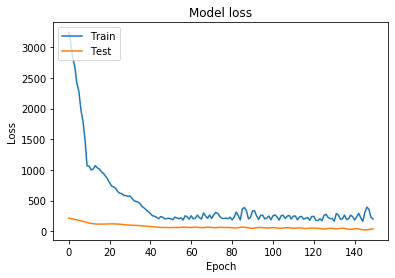

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Realizamos predicciones del test

In [14]:
model.predict(X_test)

array([[149.12755],
       [220.05486],
       [178.10497]], dtype=float32)

Comprobamos

In [15]:
y_test

,35
25,170
12,256
5,239


# Predicción

In [16]:
country_prediction_namelist = ['Mexico']

In [17]:
db = open('database_prediction.csv','w')

print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud",end=',',file=db,sep=',')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ',')
print(dia_a_predecir,file=db)

for country in country_prediction_namelist:
    f = open('propiedades_por_pais.csv')
    for line in f:
        if(country in line):
            pais=line.replace('\n','').split(',')[0]
            superficie=line.replace('\n','').split(',')[1]
            poblacion=line.replace('\n','').split(',')[2]
            namerica=line.replace('\n','').split(',')[3]
            samerica=line.replace('\n','').split(',')[4]
            europe=line.replace('\n','').split(',')[5]
            asia=line.replace('\n','').split(',')[6]
            oceania=line.replace('\n','').split(',')[7]
            africa=line.replace('\n','').split(',')[8]
            pib=line.replace('\n','').split(',')[9]
            salud_pib=line.replace('\n','').split(',')[10]            
    f.close()
    
    f = open('database_confirmed.csv')
    infected = []
    dia_inicio = 0
    for line in f:
        if(country in line.split(',')[1]):
            lat = float(line.split(',')[2])
            long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    infected.append(int(number))
                else:
                    dia_inicio += 1                    
    f.close()

    print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,dia_inicio,pib,salud_pib,end=',',file=db,sep=',')
    for value in infected[:dias_a_usar]:
        print(value,file=db,end = ',')
    if(len(infected)>=dia_a_predecir):
        print(infected[dia_a_predecir-1],file=db)
    else:
        print(-1,file=db)
db.close()          

In [18]:
data_prediction = pd.read_csv("database_prediction.csv",sep=',') 

In [19]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Mexico,1964375.0,126577691.0,1,0,0,0,0,0,23.6345,...,316,367,405,475,585,717,848,993,1094,1378


In [20]:
area_prediction = data_prediction.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
normalized_area_prediction=(area_prediction-areamin)/(areamax-areamin)
data_prediction['Area'] = normalized_area_prediction

poblacion_prediction = data_prediction.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
normalized_poblacion_prediction=(poblacion_prediction-poblacionmin)/(poblacionmax-poblacionmin)
data_prediction['poblacion'] = normalized_poblacion_prediction

lat_prediction = data_prediction.lat #returns a numpy array
normalized_lat_prediction=(lat_prediction-latmin)/(latmax-latmin)
data_prediction['lat'] = normalized_lat_prediction

long_prediction = data_prediction.long #returns a numpy array
normalized_long_prediction=(long_prediction-longmin)/(longmax-longmin)
data_prediction['long'] = normalized_long_prediction

Dia_inicio_prediction = data_prediction.Dia_inicio #returns a numpy array
normalized_Dia_inicio_prediction=(Dia_inicio_prediction-Dia_iniciomin)/(Dia_iniciomax-Dia_iniciomin)
data_prediction['Dia_inicio'] = normalized_Dia_inicio_prediction

PIB_prediction = data_prediction.PIB #returns a numpy array
normalized_PIB_prediction=(PIB_prediction-PIBmin)/(PIBmax-PIBmin)
data_prediction['PIB'] = normalized_PIB_prediction

Gasto_Salud_prediction = data_prediction.Gasto_Salud #returns a numpy array
normalized_Gasto_Salud_prediction=(Gasto_Salud_prediction-Gasto_Saludmin)/(Gasto_Saludmax-Gasto_Saludmin)
data_prediction['Gasto_Salud'] = normalized_Gasto_Salud_prediction

In [21]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,25,26,27,28,29,30,31,32,33,35
0,Mexico,0.114884,0.09026,1,0,0,0,0,0,0.579509,...,316,367,405,475,585,717,848,993,1094,1378


In [22]:
from sklearn.model_selection import train_test_split
X_prediction = pd.DataFrame()
#X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
X_prediction['Area'] = data_prediction['Area']
X_prediction['poblacion'] = data_prediction['poblacion']
X_prediction['Namerica'] = data_prediction['Namerica']
X_prediction['Samerica'] = data_prediction['Samerica']
X_prediction['Europe'] = data_prediction['Europe']
X_prediction['Asia'] = data_prediction['Asia']
X_prediction['Oceania'] = data_prediction['Oceania']
X_prediction['lat'] = data_prediction['lat']
X_prediction['long'] = data_prediction['long']
X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
X_prediction['PIB'] = data_prediction['PIB']
X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
for i in range(1,dias_a_usar+1):
    X_prediction[str(i)] = data_prediction[str(i)]
Y_prediction = pd.DataFrame()
Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
print(X_prediction.shape, Y_prediction.shape)

(1, 45) (1, 1)


In [23]:
model.predict(X_prediction)

array([[1240.7283]], dtype=float32)